# PasswordCard experiments
Taking https://www.passwordcard.org/en to new places — 3/21/22 - joeldg

The idea here is to take PasswordCard and apply easier lookup symbols and make nice some updates. 

The original PasswordCard is great but in most cases people are going to use familiar symbols like the umbrella, star, musical notes and the dollar sign. Picking familiar icon headers is a security problem and the ascii headers don't lend themselves to memonic memorization. Also, the code to generate the card seed in the original is required to be a hexadecimal number, I have changed it to use a phrase or password and still be deterministic so the card can be re-generated.

Instead of "yellow interrobang" or "green square" we can swap out to "purple gorilla" or, with a possible addition of left side icons, you could change it to "green island butterfly" or "Blue compass shark"
Colors are also less important in this instance and so you can print on black and white printers and be color-blind friendly.

The main idea is to make these fun and easy to use ... and with this Jupyter book, you can go plug in your own icon/digbat font--probably just avoid using web icon fonts that include logos unless your card method is solid.

This is obviously opensource and you can do whatever with this.

Clone the notebook and enjoy :)


In [483]:
import numpy as np
import random

CHARSETS = {
    'original.digits': u"0123456789",
    'original.alphanumeric': u"23456789abcdefghjkmnpqrstuvwxyzABCDEFGHJKLMNPQRSTUVWXYZ",
    'original.alphanumeric_with_symbols': u"23456789abcdefghjkmnpqrstuvwxyzABCDEFGHJKLMNPQRSTUVWXYZ@#$%&*<>?+{}[]()/\\"
    }

HEADERS = {
    'original': u"■□▲△○●★☂☀☁☹☺♠♣♥♦♫€¥£$!?¡¿⊙◐◩�", # standard unicode
    'animals' : u"%)hKNgH$?<+_89UVW4!@v1ABOoz*p", # from wildlife font.
    'outdoors': u"rs{nfgE$3<+_m9UqW4!@!1ABRoz*p",
    'heydings': u"rsKnfgE$3L+hmWUqG48@2HOMRol*p",
    'webdings': u"rs!%fNz$7LdhmWUqG48@2HOl,olJp",
    }

HEADERS_FONTS = {
    'original': "DejaVuSans.ttf", # required for unicode
    'animals' : "wildlife.otf", 
    'outdoors': "dnr.ttf",
    'heydings': "heydings_icons.ttf",
    'webdings': "modernpics.otf",
}

SIDE_ICONS = {
    'heydings': u"GhKq8Hfs",
    'outdoors': u"zfgmrstW",
    'animals' : u")KA7Q_?w",
    'numbers' : u"12345678",
    'letters' : u"ABCDEFGH",
}

SIDE_FONTS = {
    'heydings': "heydings_icons.ttf",
    'outdoors': "dnr.ttf",
    'animals' : "wildlife.otf",
    'numbers' : "Andale Mono",
    'letters' : "Andale Mono",
    'webdings': "modernpics.otf",
}

THEMES = {
    'default' : [(240,248,255),(127,255,212),(255,127,80),(162,205,90),(191,62,255),(238,201,0),(173,173,173),(255,182,193)]
}

#theme = [[240,248,255],[127,255,212],[255,127,80],[162,205,90],[191,62,255],[238,201,0],[173,173,173],[255,182,193]]
theme = [(240,248,255),(127,255,212),(255,127,80),(162,205,90),(191,62,255),(238,201,0),(173,173,173),(255,182,193)]


def generate_my_seed(seedPhrase):
    mybytes = seedPhrase.encode('utf-8')
    return int.from_bytes(mybytes, 'little')

def generate_character_sets(symbols="", digits=""):
    characters = {}
    characters['top_odd'] = list(CHARSETS['original.alphanumeric'])
    characters['top_even'] = list(CHARSETS['original.alphanumeric_with_symbols'])
    characters['bottom_odd'] = list(CHARSETS['original.alphanumeric'])
    characters['bottom_even'] = list(CHARSETS['original.alphanumeric_with_symbols'])
    return characters

def generate_card(seed, headers='original', width=29, height=8, symbols=False, digits=False):
    characters = generate_character_sets(symbols, digits)
    myint = generate_my_seed(seed)
    
    #print(f"My starting seed: {myint}\n")
    
    header = list(HEADERS[headers])
    random.Random(myint).shuffle(header)
        
    contents = []

    midheight = 1 + round(height/2)

    for i in range(1, midheight):
        line = []
        for j in range(width):
            myint = myint + 1
            # Even columns
            if j % 2 == 0:
                line.append(characters['top_even'][random.Random(myint).randrange(len(characters['top_even']))])
            # Odd columns
            else:
                line.append(characters['top_odd'][random.Random(myint).randrange(len(characters['top_odd']))])
        contents.append(u''.join(line))
    for j in range(midheight, height+1):
        line = []
        for j in range(width):
            myint = myint + 1
            # Even columns
            if j % 2 == 0:
                line.append(characters['bottom_even'][random.Random(myint).randrange(len(characters['bottom_even']))])
            # Odd columns
            else:
                line.append(characters['bottom_odd'][random.Random(myint).randrange(len(characters['bottom_odd']))])
        contents.append(u''.join(line))

    return u''.join(header), contents

"""
do seed and generate the card and look at it.
"""
seedPhrase="My Random Seed2"
data = generate_card(seedPhrase, "heydings")
random.Random(generate_my_seed(seedPhrase)).shuffle(theme)
side_icons_list = list(SIDE_ICONS['outdoors'])
random.Random(generate_my_seed(seedPhrase)).shuffle(side_icons_list)
side_icons = ''.join(side_icons_list)

print(theme)
print(data[0])
for v in data[1]:
    print(v)


[(255, 182, 193), (173, 173, 173), (127, 255, 212), (255, 127, 80), (162, 205, 90), (238, 201, 0), (191, 62, 255), (240, 248, 255)]
KHfWpE*gU2L$h4Rln+s@qo38MmOGr
+gRNua\eH9rz*gdCjW%a]AmvCRDEK
myN2%eYrCtks6fkAdgLe<Zrk/Cw9y
WHkNhMLczY?k%XFY7K(hQ2#D]UtR+
wud5}W(z&C&frg[tTftJ3h#mPR&SY
DeD834JKaWjKdx?MYZ4CbpDE>Zpt+
+bmbcUTz>HdUbY9qdk(CquCc\m+3(
UWMg+hACrNqD&RdZhD<QDupA*F@LL
]aqRyQ>CRr>j4Fkjkacajb\EpHtE?


## okay, we can produce the data for the card, and we can recreate it every time
## with the same seed.  Let's try to generate a card image with some fonts..
## this is a test, so continue on to see the function.

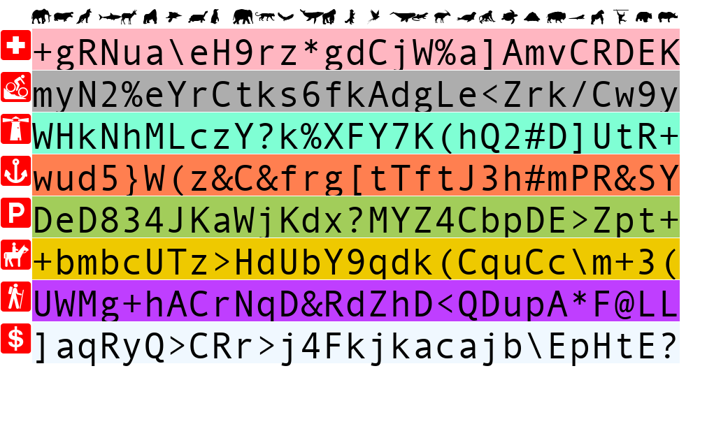

In [484]:
"""
QUICK TEST OF THE ABOVE AND FOR FONT SPACING
"""
from PIL import Image, ImageFont, ImageDraw

header_font_file = 'wildlife.otf'# 'wildlife.otf', 'heydings_icons.ttf', 'dnr.ttf'
side_font_file = 'dnr.ttf'

#basefont = ImageFont.load_default()
# mono base fonts: "Andale Mono", "Courier", "Menlo"
basefont = ImageFont.truetype("Andale Mono", 53)

image = Image.new(mode='RGB', size=(1011, 637), color='#ffffff')
draw = ImageDraw.Draw(im=image)

base_rect_offset = 40
base_rect_depth = base_rect_offset + 60

"""
Draw the colored rectangles and fill with data
"""
side_font=ImageFont.truetype(font=side_font_file, size=54) # same size as base
offset = 0
#draw.rectangle((1, base_rect_offset, 44, base_rect_offset+(60*8)), fill=('black'), outline=('white'))
for idx, val in enumerate(theme, start=1):
    bbox = draw.textbbox((1, base_rect_offset+offset+2), side_icons[idx-1], font=header_font)
    draw.text(xy=(1, base_rect_offset+offset+2), text=side_icons[idx-1], font=side_font, fill='red')
    
    draw.rectangle((45, base_rect_offset+offset, 972, base_rect_depth+offset), fill=(val), outline=(255, 255, 255))
    draw.text(xy=(45, 44+offset), text=data[1][idx-1], font=basefont, fill='black')
    offset = (60*idx)
   
"""
Draw the headers
"""
text_text_width=972-45
max_font_width=int(text_text_width/len(data[0])+1)
header_font=ImageFont.truetype(font=header_font_file, size=max_font_width)
xy = (45, 5)
max_len = max(font.getsize(c) for c in data[0])
x, y = xy
for c in data[0]:
  bbox = draw.textbbox((x, y), c, font=header_font)
  #draw.rectangle(bbox, fill='white', outline="red")
  draw.text(xy=(x, 5), text=c, font=header_font, fill='black')
  x += max_font_width
  
scale = 0.7
display(image.resize(( int(image.width * scale), int(image.height * scale))))

# here is our test

## So now we have everything in place and can create a function.
## and set it up with proper inputs so we can control everything with one call.
The outline will look like:
* manage inputs
* generate and manage header, side and lines
* determine fonts and which sets to use for headers/side
* generate and return image

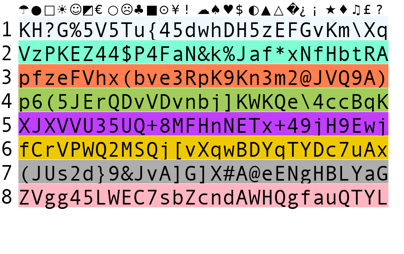

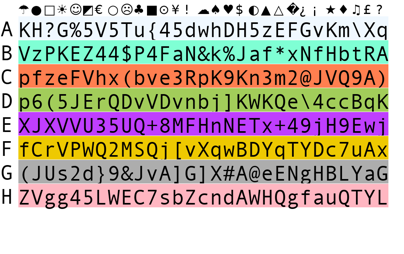

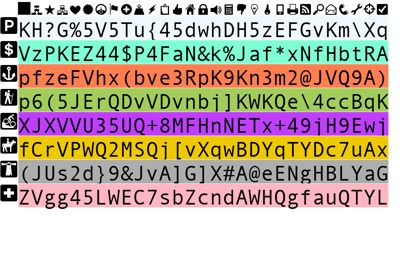

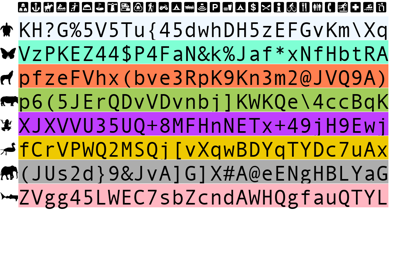

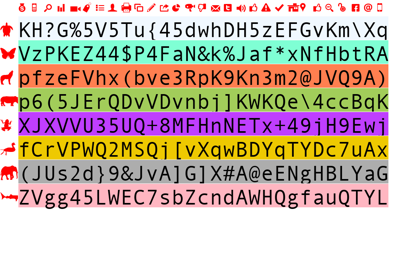

In [486]:
from PIL import Image, ImageFont, ImageDraw

"""
Generate our new type of PasswordCard.
"""
def passwordcard(
        seed, 
        headers   = 'original', 
        siders    = 'numbers',
        rnd_head  = True,
        rnd_side  = False, 
        theme     = 'default',
        hcolor    = 'black',
        scolor    = 'black'
    ):
    data  = generate_card(seed, headers)
    theme = THEMES[theme]
    
    header_font     = HEADERS_FONTS[headers]
    side_font       = SIDE_FONTS[siders]
    side_icons_list = list(SIDE_ICONS[siders])
    myint = generate_my_seed(seed)
    if rnd_side:
        random.Random(myint).shuffle(side_icons_list)
    
    side_icons = ''.join(side_icons_list)
        
    # we should have everything needed for the basic card now.    
    basefont         = ImageFont.truetype("Andale Mono", 53) # "Andale Mono", "Courier" (54), "Menlo"
    sidefont         = ImageFont.truetype(side_font, 53)
    headerfont       = ImageFont.truetype(header_font, 53)
    defaultfont      = ImageFont.truetype("DejaVuSans.ttf", 53)
    offset           = 0
    image            = Image.new(mode='RGB', size=(1011, 637), color='#ffffff')
    draw             = ImageDraw.Draw(im=image)
    base_rect_offset = 40
    base_rect_depth  = base_rect_offset + 60
    """
    Draw the colored rectangles and fill with data
    """
    for idx, val in enumerate(theme, start=1):
        #bbox = draw.textbbox((1, base_rect_offset+offset+2), side_icons[idx-1], font=headerfont)
        draw.text(xy=(1, base_rect_offset+offset+2), text=side_icons[idx-1], font=sidefont, fill=scolor)

        draw.rectangle((45, base_rect_offset+offset, 972, base_rect_depth+offset), fill=(val), outline=(255, 255, 255))
        draw.text(xy=(45, 44+offset), text=data[1][idx-1], font=basefont, fill='black')
        offset = (60*idx)

    """
    Draw the headers
    """
    text_text_width=972-45
    max_font_width=int(text_text_width/len(data[0])+1)
    header_font=ImageFont.truetype(font=header_font, size=max_font_width)
    #header_font= defaultfont
    xy = (45, 5)
    max_len = max(font.getsize(c) for c in data[0])
    x, y = xy
    for c in data[0]:
      #bbox = draw.textbbox((x, y), c, font=header_font)
      #draw.rectangle(bbox, fill='white', outline="red")
      draw.text(xy=(x, 5), text=c, font=header_font, fill=hcolor)
      x += max_font_width

    scale = 0.4
    display(image.resize(( int(image.width * scale), int(image.height * scale))))    
    
    

# now lets try a few sample cards using the same seed
# passwordcard({seed}, {headers}, {sidebar}, {rand header}, {rand side}, {theme}, {head color}, {side color})
passwordcard("test")
passwordcard('test', 'original','letters')
passwordcard('test', 'heydings','outdoors', True, True, 'default')
passwordcard('test', 'outdoors','animals', True, True, 'default')
passwordcard('test', 'webdings','animals', True, True, 'default', 'red', 'red')
        